In [50]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import ast

# Baseline results

In [51]:
df_base = pd.read_csv(r"EdgeVPINNs\accuracy_results_csv_files\baseline_result.csv")


In [52]:
#removing unnecessary seed values

values_to_remove = [559, 33, 433, 605, 90]

df_base = df_base[~df_base['experimentation.seed'].isin(values_to_remove)]



In [53]:
mean_linf = df_base['linf'].mean()
mean_l2_error = df_base['l2'].mean()

print(mean_l2_error)
print(mean_linf)

0.01651307798518966
0.047261266056632945


# SVD results

In [54]:
df_result_svd = pd.read_csv(r"EdgeVPINNs\accuracy_results_csv_files\svd_result.csv")

df_result_svd['svd_rank'] = df_result_svd['fe.svd_rank']


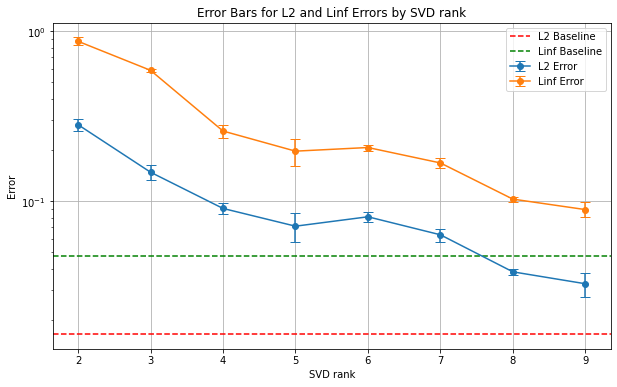

In [55]:
grouped = df_result_svd.groupby('svd_rank').agg(
    l2_mean=('l2', 'median'),
    l2_std=('l2', 'std'),
    linf_mean=('linf', 'median'),
    linf_std=('linf', 'std')
).reset_index()


# Plotting
plt.figure(figsize=(10, 6))
#plt.yscale('log')

# Plot l2_error with error bars
plt.errorbar(grouped['svd_rank'], grouped['l2_mean'], yerr=grouped['l2_std'], fmt='o-', label='L2 Error', capsize=5)

# Plot l1_error with error bars
plt.errorbar(grouped['svd_rank'], grouped['linf_mean'], yerr=grouped['linf_std'], fmt='o-', label='Linf Error', capsize=5)
plt.axhline(y=mean_l2_error, color='r', linestyle='--', label='L2 Baseline')
plt.axhline(y=mean_linf, color='g', linestyle='--', label='Linf Baseline')

plt.yscale('log')

plt.xlabel('SVD rank')
plt.ylabel('Error')
plt.title('Error Bars for L2 and Linf Errors by SVD rank')
plt.legend()
plt.grid(True)
plt.show()

# Tucker results

In [56]:
df_result_tucker = pd.read_csv(r"EdgeVPINNs\accuracy_results_csv_files\tucker_result.csv")

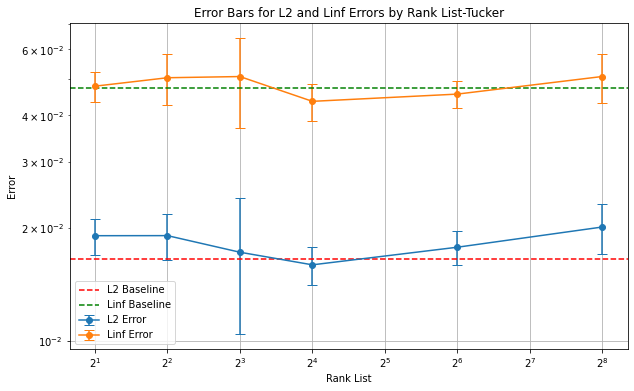

In [57]:
grouped = df_result_tucker.groupby('first_element').agg(
    l2_mean=('l2', 'median'),
    l2_std=('l2', 'std'),
    linf_mean=('linf', 'median'),
    linf_std=('linf', 'std')
).reset_index()


# Plotting
plt.figure(figsize=(10, 6))

# Plot l2_error with error bars
plt.errorbar(grouped['first_element'], grouped['l2_mean'], yerr=grouped['l2_std'], fmt='o-', label='L2 Error', capsize=5)

# Plot l1_error with error bars
plt.errorbar(grouped['first_element'], grouped['linf_mean'], yerr=grouped['linf_std'], fmt='o-', label='Linf Error', capsize=5)
plt.axhline(y=mean_l2_error, color='r', linestyle='--', label='L2 Baseline')
plt.axhline(y=mean_linf, color='g', linestyle='--', label='Linf Baseline')

plt.yscale('log')
plt.xscale('log',base=2)



plt.xlabel('Rank List')
plt.ylabel('Error')
plt.title('Error Bars for L2 and Linf Errors by Rank List-Tucker')
plt.legend()
plt.grid(True)
plt.show()

# TTD results

In [58]:
df_result_ttd = pd.read_csv(r"EdgeVPINNs\accuracy_results_csv_files\ttd_result.csv")

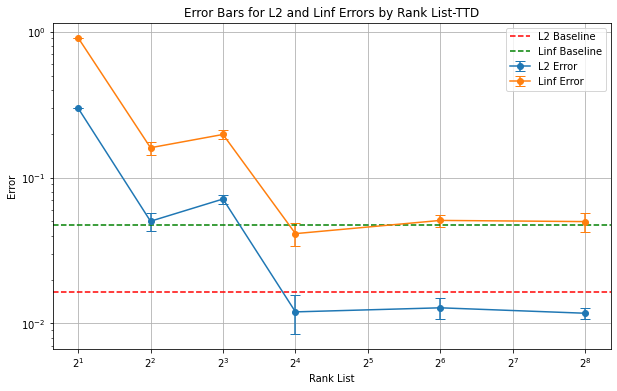

In [59]:
grouped = df_result_ttd.groupby('first_element').agg(
    l2_mean=('l2', 'median'),
    l2_std=('l2', 'std'),
    linf_mean=('linf', 'median'),
    linf_std=('linf', 'std')
).reset_index()


# Plotting
plt.figure(figsize=(10, 6))

# Plot l2_error with error bars
plt.errorbar(grouped['first_element'], grouped['l2_mean'], yerr=grouped['l2_std'], fmt='o-', label='L2 Error', capsize=5)

# Plot l1_error with error bars
plt.errorbar(grouped['first_element'], grouped['linf_mean'], yerr=grouped['linf_std'], fmt='o-', label='Linf Error', capsize=5)
plt.axhline(y=mean_l2_error, color='r', linestyle='--', label='L2 Baseline')
plt.axhline(y=mean_linf, color='g', linestyle='--', label='Linf Baseline')

plt.yscale('log')
plt.xscale('log',base=2)



plt.xlabel('Rank List')
plt.ylabel('Error')
plt.title('Error Bars for L2 and Linf Errors by Rank List-TTD')
plt.legend()
plt.grid(True)
plt.show()